# Introduction

The assignment is provided with-

* Nima Ports datasets which is a shape file that contains the information of all the ports in Canada including port name, port size and port positions. 
* AISData.csv which contains the trajectory information generated by one vessel. We have merged this data with ais_ferry.csv provided in the Lab-4 session.

Using the above-mentioned data files, we have found the solutions for the given problems in the assignment as below:

In [132]:
#importing all required libraries
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import shapely
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# Import AISData.csv given in the assignment and ais_ferry.csv used in the Lab-4. 
# Merged both the csv files in single dataframe df

df1=pd.read_csv('AISData.csv')
df1=df1.rename(columns = {'location.coordinates.0':'x','location.coordinates.1':'y'})
df2=pd.read_csv('ais_ferry.csv')
df2=df2.rename(columns = {'location.coordinates.0':'x','location.coordinates.1':'y'})
df=pd.concat([df1, df2], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [134]:
# Displaying the dataframe information. 826740 entries are found.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826740 entries, 0 to 826739
Data columns (total 8 columns):
Unnamed: 0           766671 non-null float64
cog                  750642 non-null float64
event_time           826740 non-null object
mmsi                 826740 non-null int64
position_accuracy    697295 non-null float64
sog                  750642 non-null float64
x                    822376 non-null float64
y                    822376 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 50.5+ MB


In [135]:
# displaying the GeoDataFrame with the AIS messages 

gdf = gpd.GeoDataFrame(df.drop(['x', 'y'], axis=1),
crs={'init': 'epsg:4326'},
geometry=[shapely.geometry.Point(xy) for xy in zip(df.x, df.y)])
gdf.head()

,Unnamed: 0,cog,event_time,mmsi,position_accuracy,sog,geometry
0,0.0,319.500000,2019-04-11T09:47:30.153Z,316013808,0.0,3.0,POINT (-63.55608166666666 44.624835)
1,1.0,320.700012,2019-04-11T09:47:27.273Z,316013808,0.0,3.0,POINT (-63.55605333333333 44.62481666666667)
2,2.0,319.500000,2019-04-11T09:47:34.340Z,316013808,0.0,2.9,POINT (-63.55613833333334 44.62486833333333)
3,3.0,319.799988,2019-04-11T09:47:37.087Z,316013808,0.0,3.0,POINT (-63.55618666666667 44.62489833333333)
4,4.0,337.200012,2019-04-19T09:52:19.358Z,316013808,0.0,3.2,POINT (-63.55599833333334 44.62488333333334)


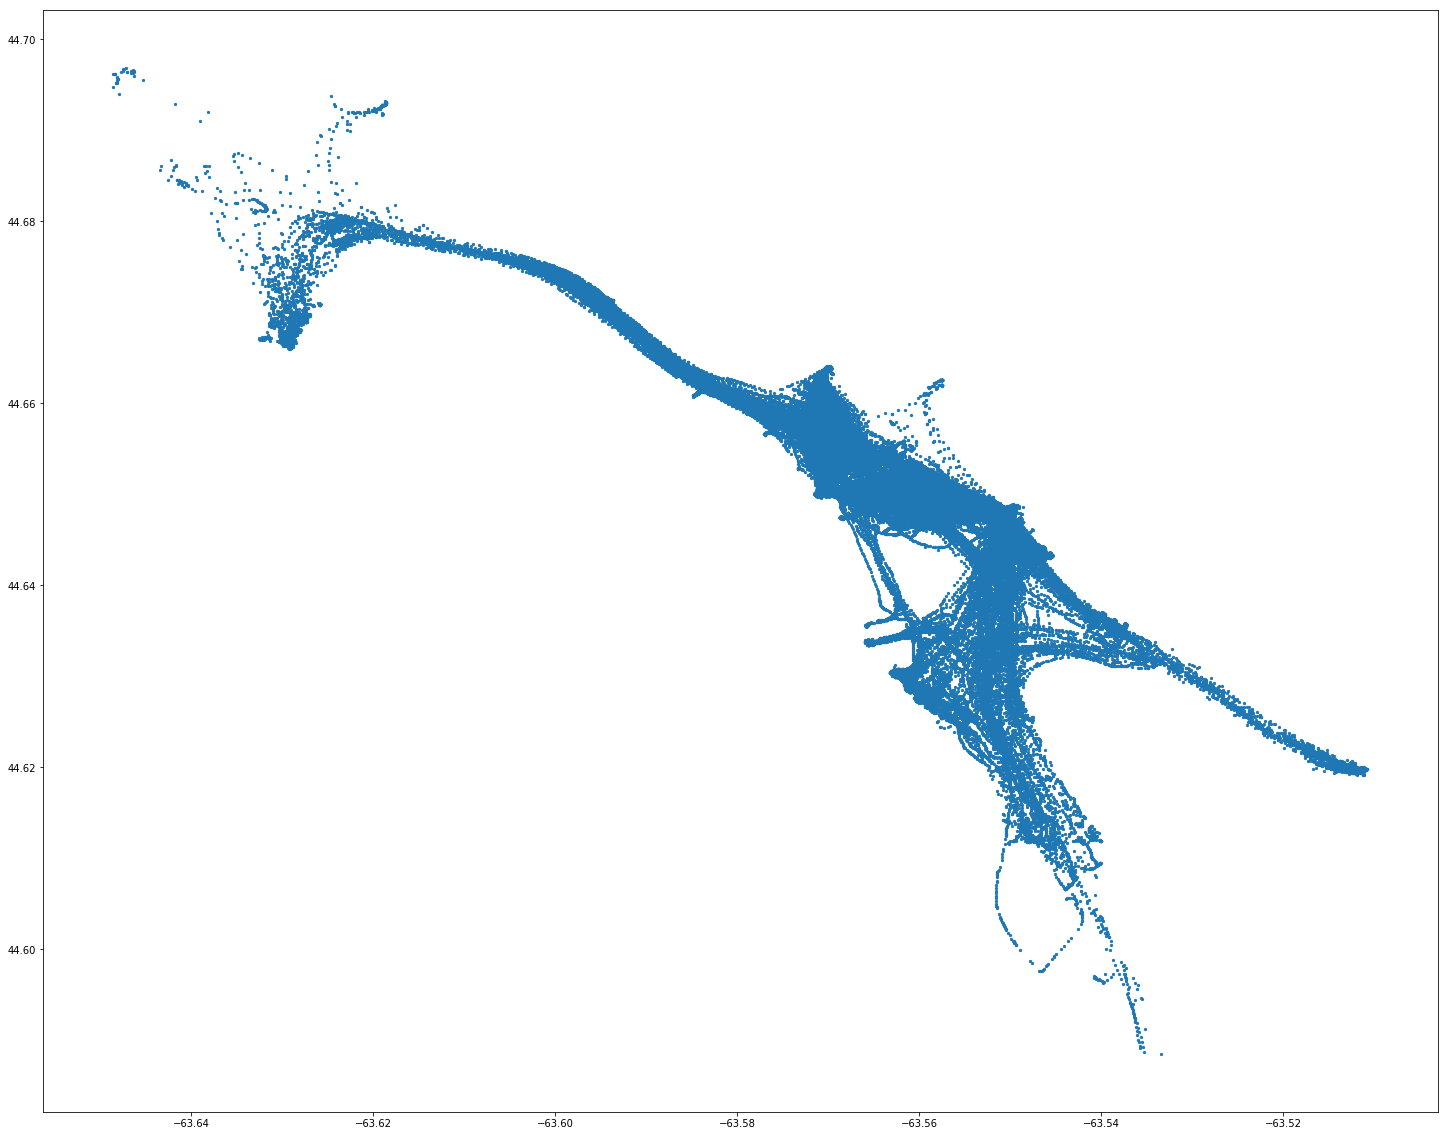

In [136]:
# Plotting the GeoDataFrame gdf which contains the messages data

ax=gdf.plot(figsize=(25,25),markersize=5)

In [137]:
# Importing the shape file which contains the information about all the ports in Canada.
# Displaying the sample structure of the file using .head()

Canada_ports=gpd.read_file('assignment3shapefile.shp')
bylaw=Canada_ports.set_index(['port_name'])
bylaw.head()

,field_1,size,geometry
port_name,,,
pointpolygon,0,0.0000,"POLYGON ((-63.59160304069519 44.6649292254607,..."
port1,1,0.0018,"POLYGON ((-63.569431 44.649993, -63.5694396674..."
port2,2,0.0018,"POLYGON ((-63.60949000000001 44.675853, -63.60..."
ind,3,0.0000,POLYGON ((-63.54742169380188 44.64697911403847...
port5,4,0.0018,"POLYGON ((-63.568048 44.663875, -63.5680566674..."


#  1. Here, we are finding all the vessels that visited ports in the provided shapefile that is imported above. 
For this, we have


* found all the vessels that visited ports in Canada
* displayed the polygons in palevioletred color
* created buffers around each polygon with an approximate radius of 0.001 and displayed the buffer region in lightsalmon color
* identified the AIS messages that are intersecting the buffer regions of each polygon and displayed the areas with darkslateblue
* calculated density for each polygon, which is the number of AIS messages in each port

/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


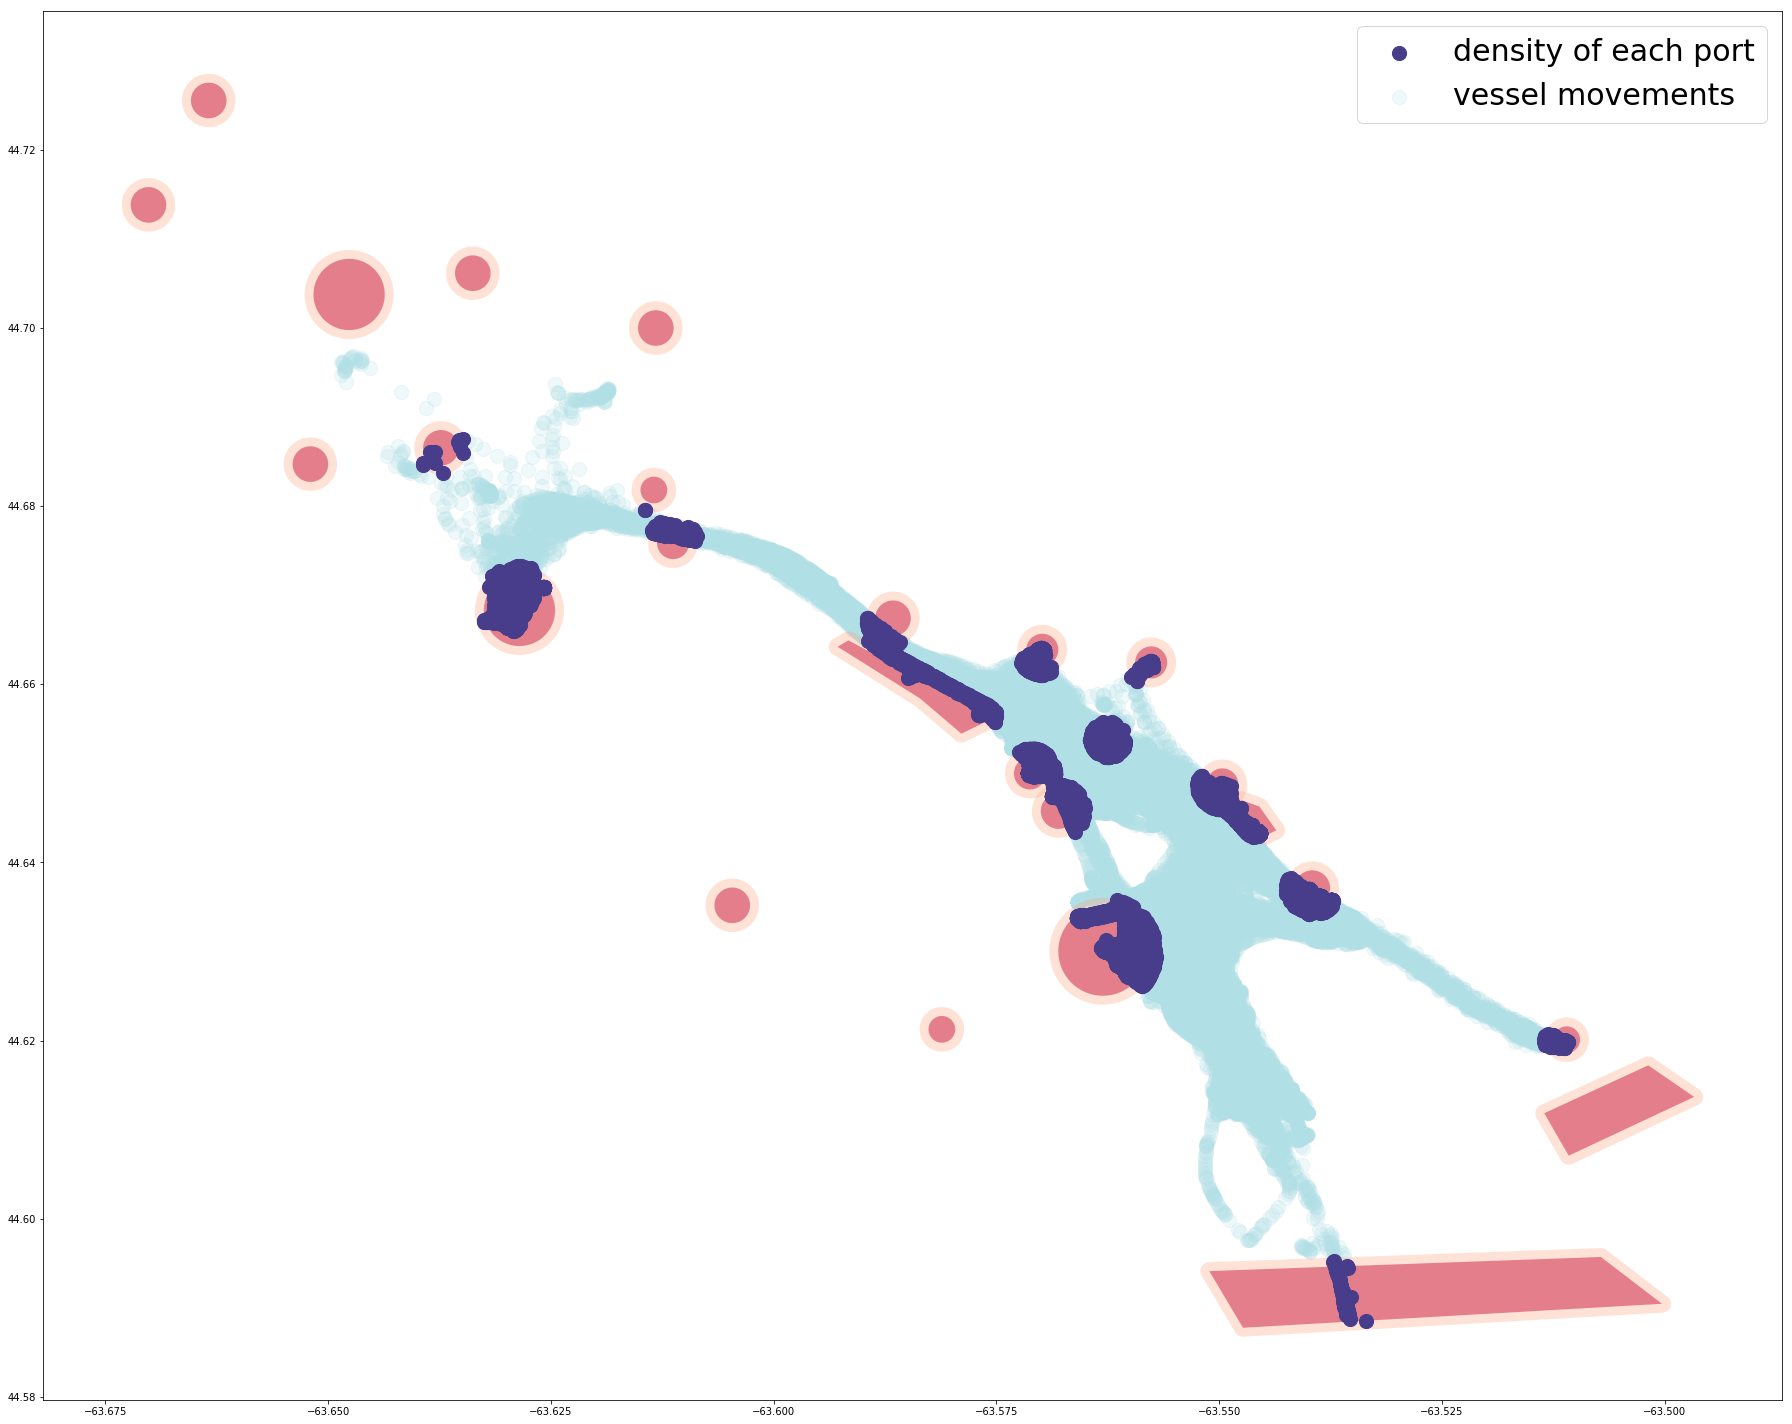

In [138]:
# Find all the vessels that visited ports in Canada
# Displayed the polygons in palevioletred color
# Created buffers around each polygon with an approximate radius of 0.001 and displayed the buffer region in lightsalmon color
# Identified the AIS messages that are intersecting the buffer regions of each polygon and displayed the areas with darkslateblue
# Calculated density for each polygon, which is the number of AIS messages in each port

density = {}
counter=0

ax=bylaw.plot(color='palevioletred', label = 'port', figsize=(25,25) , markersize=200)
gdf.plot(ax=ax,color='powderblue',label = 'vessel movements' , alpha=0.2, markersize=200)
gv = bylaw.geometry.buffer(0.001)
gpd.GeoSeries(gv).plot(ax=ax,color='lightsalmon', label = 'buffer region',alpha=0.3, markersize=200)
for index,row in bylaw.iterrows():
    den=gdf.loc[gdf.within(gv[counter]),:]
    den.plot(ax=ax,color='darkslateblue', label = 'density of each port', markersize=200)
    density[index] = len(den)
    counter+=1
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels,fontsize=30)
plt.tight_layout()
plt.show()

In [140]:
# displaying the densities for each port which are calculated above
density

{'pointpolygon': 1102,
 'port1': 16888,
 'port2': 229,
 'ind': 4504,
 'port5': 9837,
 'port6': 121,
 'port7': 710209,
 'south_enterance': 44,
 'auto_port': 2215,
 'southend container terminal': 8722,
 'NN Jetty': 0,
 'Bills island': 0,
 'mid bedford': 0,
 'Fairview cove': 1552,
 'armament': 655,
 'waterfront h': 468,
 'northarm': 0,
 'plll': 0,
 'pp': 0,
 'po001': 2289,
 'po002': 2,
 'oulier_maybecday': 1031,
 'p003': 0,
 'enter2': 0,
 'p009': 0,
 'p010': 14}

# 2. Here, we are showing the density (i.e., density is the number of AIS messages in a port), of each port on a map by using a colour-coded map.

For this, we have 


* categorized the density of ports into low, medium and high densities as below:
  low - If the density is below 100, 
  medium - If the density is between 1000 and 5000, 
  high - If the density is more than 5000
* displayed the low densities in palegreen color, medium densities in cornflowerblue color and, 
  high densities in darkblue color

In [15]:
# Categorizing the densities into low, medium and high

low = {}
medium={}
high={}

for k,v in density.items():
    if v <=1000:
        low[k] = v
    elif v > 1000 and v<=5000:
        medium[k] = v
    else:
        high[k] = v                

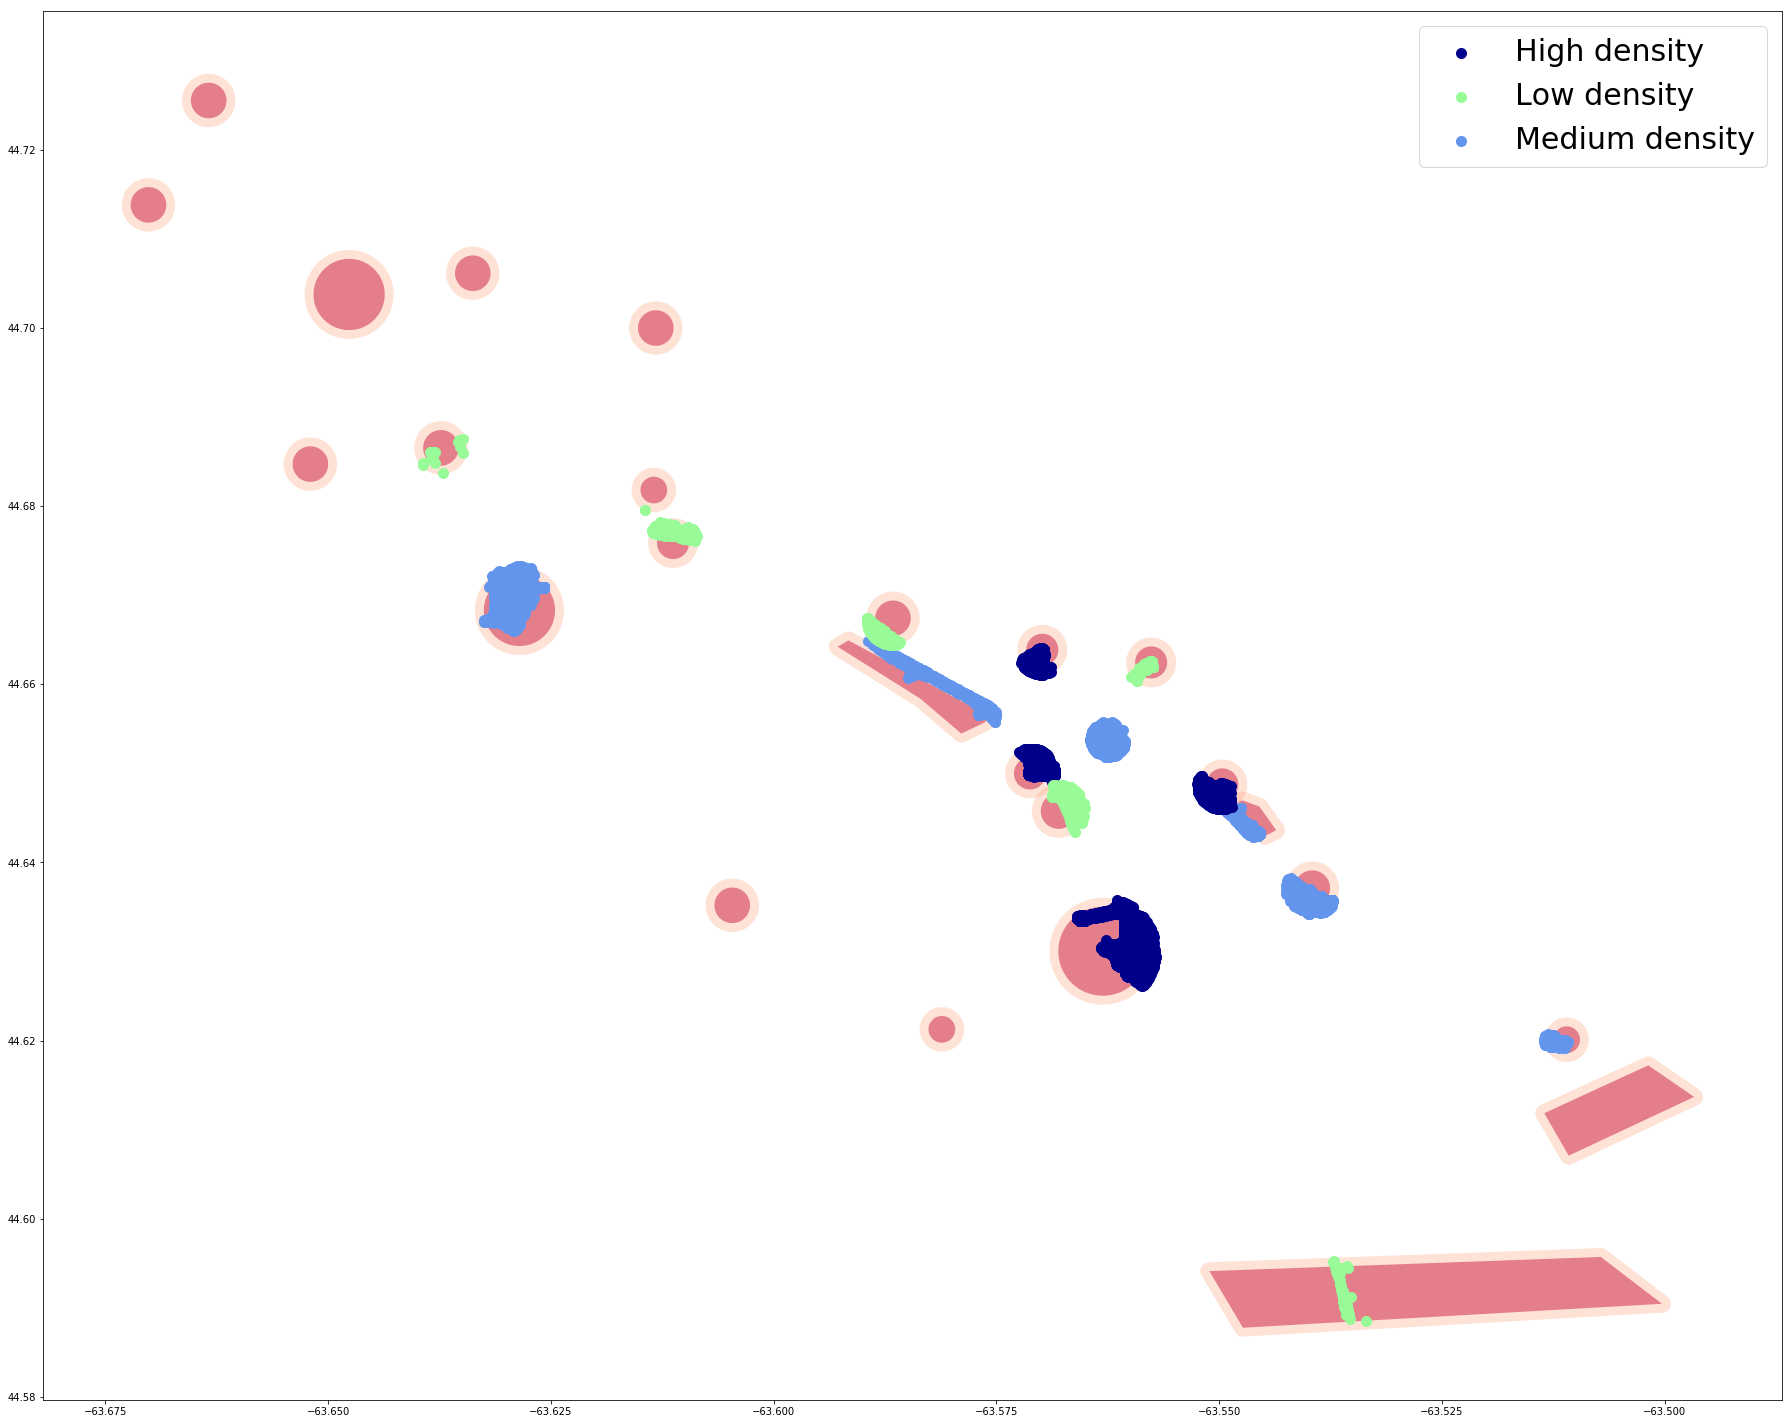

In [16]:
# displayed the low densities in palegreen color, medium densities in cornflowerblue color and, high densities in darkblue color
import numpy as np

counter = 0
ax=bylaw.plot(color='palevioletred',figsize=(25,25))
gv = bylaw.geometry.buffer(0.001)
gpd.GeoSeries(gv).plot(ax=ax,color='lightsalmon',alpha=0.3)
for index,row in bylaw.iterrows():
    den=gdf.loc[gdf.within(gv[counter]),:]
    if index in low.keys():
        den.plot(ax=ax,c='palegreen', label = 'Low density', markersize=100)  
    elif index in medium.keys():
        den.plot(ax=ax,c='cornflowerblue', label = 'Medium density', markersize=100)
    else:
        den.plot(ax=ax,c='darkblue', label = 'High density', markersize=100)    
    counter+=1

handles, labels = ax.get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels,fontsize=30) 
plt.tight_layout()
plt.show()

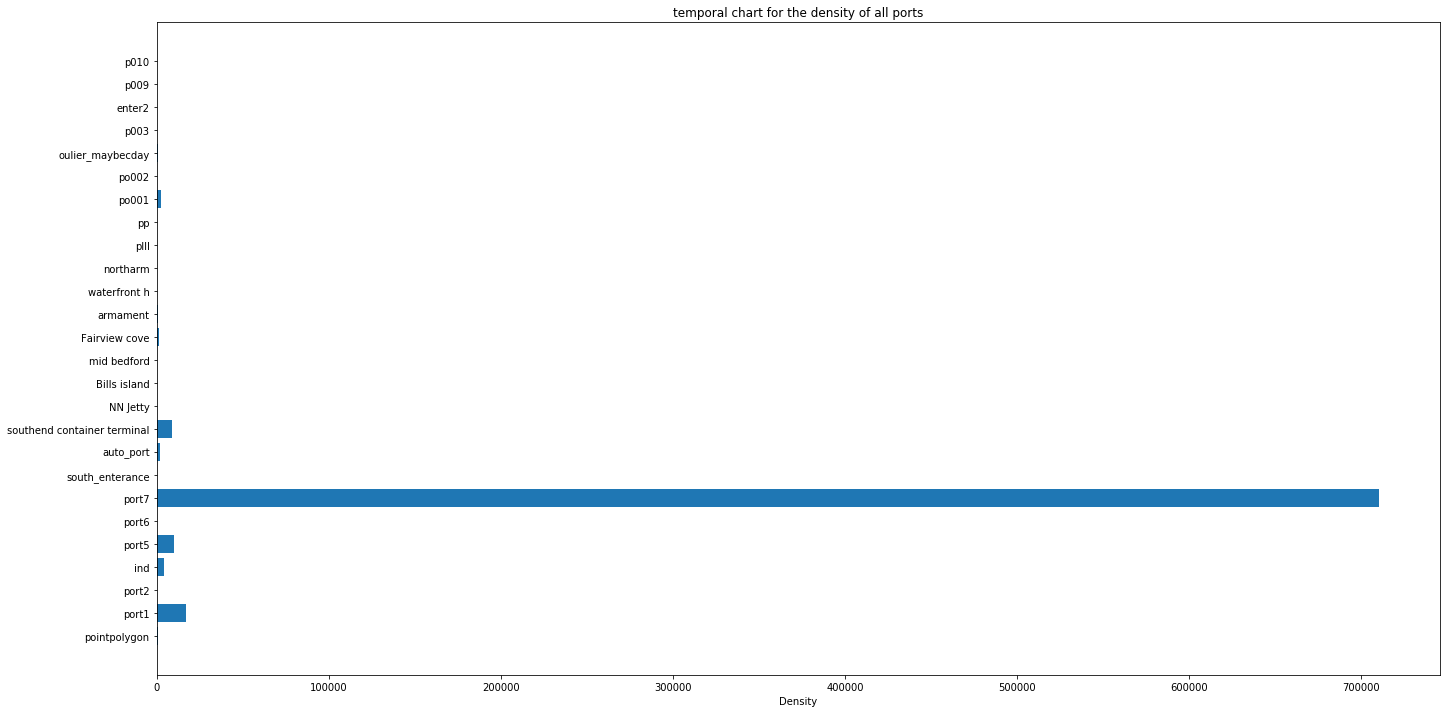

In [17]:
# temporal chart for the density of all ports

performance = list(density.values())
objects = (density.keys())
y_pos = np.arange(len(objects))
bar_width = 0.8

plt.figure(figsize=(23,12))
plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('Density')
plt.title('temporal chart for the density of all ports')

plt.show()

# 3.  Steps 1 and 2 on Hourly data

Here, we have 

* split the event_time column in AIS data to derive day and hour data and added these columns to the dataframe gdf.
* repeated the above steps 1 and 2 for all of the sub-dataframes.
* displayed the plots for each hour along with saving the PNG files of plots to a folder named 'hourly-densities'
* color coded the densities based on low, medium and high density categories and saved to folder names 'hourly-densities-colorcoded'

In [141]:
# splitting the column event_time to day and hour and adding these columns back to the dataframe
day=gdf.event_time.str.slice(0,10)
hour=gdf.event_time.str.slice(11,13)
gdf['day'] = day
gdf['hour'] = hour
gdf.head()

,Unnamed: 0,cog,event_time,mmsi,position_accuracy,sog,geometry,day,hour
0,0.0,319.500000,2019-04-11T09:47:30.153Z,316013808,0.0,3.0,POINT (-63.55608166666666 44.624835),2019-04-11,09
1,1.0,320.700012,2019-04-11T09:47:27.273Z,316013808,0.0,3.0,POINT (-63.55605333333333 44.62481666666667),2019-04-11,09
2,2.0,319.500000,2019-04-11T09:47:34.340Z,316013808,0.0,2.9,POINT (-63.55613833333334 44.62486833333333),2019-04-11,09
3,3.0,319.799988,2019-04-11T09:47:37.087Z,316013808,0.0,3.0,POINT (-63.55618666666667 44.62489833333333),2019-04-11,09
4,4.0,337.200012,2019-04-19T09:52:19.358Z,316013808,0.0,3.2,POINT (-63.55599833333334 44.62488333333334),2019-04-19,09


In [150]:
# splitting and storing the messages by day and hour into dictionary 'daily_dfs'
daily_dfs = dict(tuple(gdf.groupby('day')))
for d, dfr in daily_dfs.items():
    hourly_dfs = dict(tuple(dfr.groupby('hour')))
    daily_dfs[d] = hourly_dfs

In [ ]:
# calculating densities of all ports for each hour from hour 00 to hour 23
# Generating the plots for each day and hour and saving them to the folder 'hourly-densities' with title format -
# 'Day- XX-XX-XXXX Hour- XX'

from os import path
outpath = "./hourly-densities/"
titl = ''

daily_densities = {}

for day, hdf in daily_dfs.items():

    hourly_densities = {}

    for key,value in hdf.items(): 
        density_list = {}
        counter = 0
        ax=bylaw.plot(color='palevioletred', label = 'port', figsize=(25,25) , markersize=200)
        titl = 'Day- ' + day + ' Hour- ' + key
        plt.title(titl)
        value.plot(ax=ax,color='powderblue',label = 'vessel movements' , alpha=0.2, markersize=200)
        gv = bylaw.geometry.buffer(0.001)
        gpd.GeoSeries(gv).plot(ax=ax,color='lightsalmon', label = 'buffer region',alpha=0.3, markersize=200)
        for index,row in bylaw.iterrows():
            den = value.loc[value.within(gv[counter]),:]
            den.plot(ax=ax,color='darkslateblue', label = 'density of each port', markersize=200)
            density_list[index]=len(den)
            counter += 1

        handles, labels = plt.gca().get_legend_handles_labels()
        labels, ids = np.unique(labels, return_index=True)
        handles = [handles[i] for i in ids]
        plt.legend(handles, labels,fontsize=30)
        hourly_densities[key] = density_list
        titl += ".png"
        plt.savefig(path.join(outpath,titl))
    daily_densities[day] = hourly_densities

In [153]:
# displaying daily densities calculated above
daily_densities

{'2019-03-05': {'21': {'pointpolygon': 0,
   'port1': 0,
   'port2': 0,
   'ind': 0,
   'port5': 1,
   'port6': 0,
   'port7': 162,
   'south_enterance': 0,
   'auto_port': 0,
   'southend container terminal': 0,
   'NN Jetty': 0,
   'Bills island': 0,
   'mid bedford': 0,
   'Fairview cove': 0,
   'armament': 0,
   'waterfront h': 0,
   'northarm': 0,
   'plll': 0,
   'pp': 0,
   'po001': 0,
   'po002': 0,
   'oulier_maybecday': 6,
   'p003': 0,
   'enter2': 0,
   'p009': 0,
   'p010': 0},
  '22': {'pointpolygon': 0,
   'port1': 0,
   'port2': 0,
   'ind': 0,
   'port5': 6,
   'port6': 0,
   'port7': 0,
   'south_enterance': 0,
   'auto_port': 0,
   'southend container terminal': 0,
   'NN Jetty': 0,
   'Bills island': 0,
   'mid bedford': 0,
   'Fairview cove': 2,
   'armament': 4,
   'waterfront h': 0,
   'northarm': 0,
   'plll': 0,
   'pp': 0,
   'po001': 0,
   'po002': 0,
   'oulier_maybecday': 0,
   'p003': 0,
   'enter2': 0,
   'p009': 0,
   'p010': 0}},
 '2019-03-06': {'00': {

### NOTE: 

### As the execution time is more to execute the below code for color-coded hourly densities, we have saved only 27 plots to the mentioned folder. However, code works to save all the plots without any restrictions.

In [ ]:
# Categorized the densities into low, medium and high 
# Color coded the densities for each day and each one-hour interval
# saving all the plots to folder named "hourly-densities-colorcoded" with title format - 'Day- XX-XX-XXXX Hour- XX'

from os import path
outpath = "./hourly-densities-colorcoded/"
titl = ''

for day,hdf in daily_dfs.items():
    hourly_dfs = hdf
    h_den = daily_densities[day]

    for key,value in hourly_dfs.items(): 
        
        den_values = h_den[key]
        
        low = {}
        medium={}
        high={}

        for k,v in den_values.items():
        
            if v <=10:
                low[k] = v
            elif v > 10 and v<=100:
                medium[k] = v
            else:
                high[k] = v                

        counter = 0
        ax=bylaw.plot(color='palevioletred',figsize=(25,25))
        titl = 'Day- ' + day + ' Hour- ' + key
        plt.title(titl)
        gv = bylaw.geometry.buffer(0.001)
        gpd.GeoSeries(gv).plot(ax=ax,color='lightsalmon',alpha=0.3)
        for index,row in bylaw.iterrows():
            den=gdf.loc[gdf.within(gv[counter]),:]
            if index in low.keys():
                den.plot(ax=ax, label = 'Low density', markersize=100, c='palegreen')
            elif index in medium.keys():
                den.plot(ax=ax, label = 'Medium density', markersize=100, c='cornflowerblue')
            elif index in high.keys():
                den.plot(ax=ax, label = 'High density', markersize=100, c='darkblue')
            den=value.loc[value.within(gv[counter]),:]
            counter+=1

        handles, labels = ax.get_legend_handles_labels()
        labels, ids = np.unique(labels, return_index=True)
        handles = [handles[i] for i in ids]
        plt.legend(handles, labels,fontsize=30)
        titl += ".png"
        plt.savefig(path.join(outpath,titl))

# 4. Temporal chart for all the ports with hours on x axis and density for each hour on Y-axis for all the ports.

In [ ]:
# split hourly data
gdf.event_time = gdf.event_time.str.slice(11, 13)
hdfs = dict(tuple(gdf.groupby('event_time')))

In [ ]:
# calculating densities of all ports for each hour from hour 00 to hour 23 irrespective of day

hourly_densities = {}

for key,value in hdfs.items(): 
    density_list = {}
    counter = 0
    ax=bylaw.plot(color='palevioletred', label = 'port', figsize=(25,25) , markersize=200)
    titl = 'At the Hour- ' + key
    plt.title(titl)
    value.plot(ax=ax,color='powderblue',label = 'vessel movements' , alpha=0.2, markersize=200)
    gv = bylaw.geometry.buffer(0.001)
    gpd.GeoSeries(gv).plot(ax=ax,color='lightsalmon', label = 'buffer region',alpha=0.3, markersize=200)
    for index,row in bylaw.iterrows():
        den = value.loc[value.within(gv[counter]),:]
        den.plot(ax=ax,color='darkslateblue', label = 'density of each port', markersize=200)
        density_list[index]=len(den)
        counter += 1
        
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels,fontsize=30)
    hourly_densities[key] = density_list

In [20]:
# displaying the hourly densities of all plots for each hour, which is calculated above.
hourly_densities

{'00': {'pointpolygon': 7,
  'port1': 355,
  'port2': 10,
  'ind': 472,
  'port5': 330,
  'port6': 0,
  'port7': 29603,
  'south_enterance': 0,
  'auto_port': 195,
  'southend container terminal': 418,
  'NN Jetty': 0,
  'Bills island': 0,
  'mid bedford': 0,
  'Fairview cove': 98,
  'armament': 25,
  'waterfront h': 0,
  'northarm': 0,
  'plll': 0,
  'pp': 0,
  'po001': 110,
  'po002': 0,
  'oulier_maybecday': 20,
  'p003': 0,
  'enter2': 0,
  'p009': 0,
  'p010': 0},
 '01': {'pointpolygon': 34,
  'port1': 377,
  'port2': 8,
  'ind': 0,
  'port5': 345,
  'port6': 0,
  'port7': 29985,
  'south_enterance': 25,
  'auto_port': 13,
  'southend container terminal': 443,
  'NN Jetty': 0,
  'Bills island': 0,
  'mid bedford': 0,
  'Fairview cove': 61,
  'armament': 41,
  'waterfront h': 35,
  'northarm': 0,
  'plll': 0,
  'pp': 0,
  'po001': 220,
  'po002': 0,
  'oulier_maybecday': 21,
  'p003': 0,
  'enter2': 0,
  'p009': 0,
  'p010': 0},
 '02': {'pointpolygon': 9,
  'port1': 353,
  'port2':

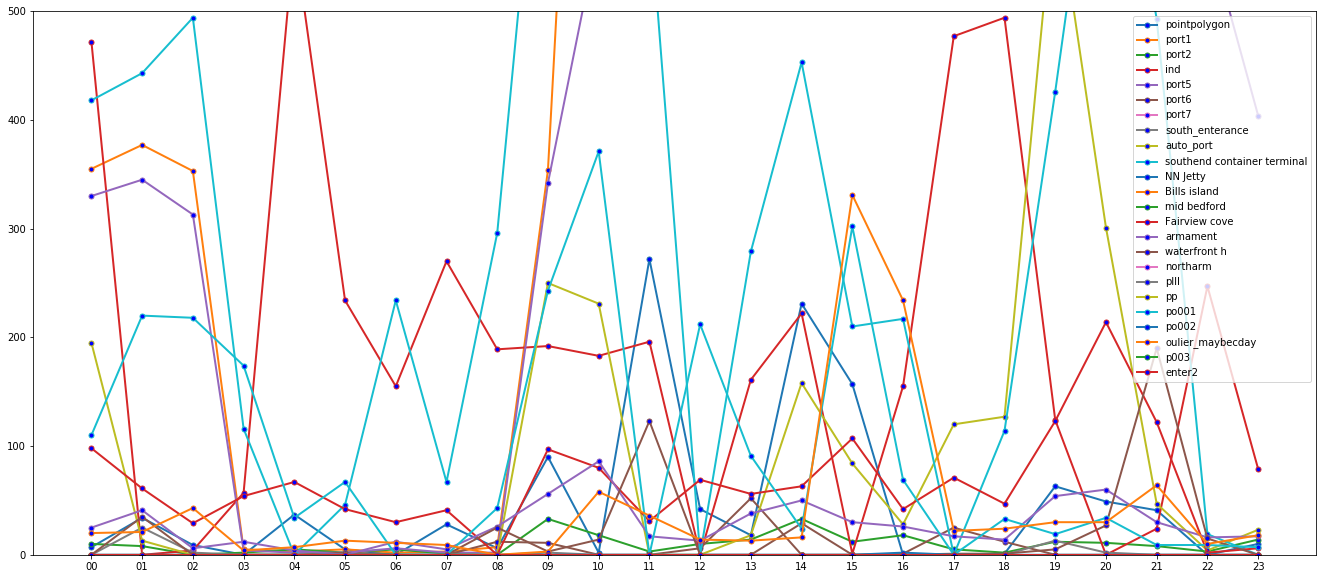

In [22]:
# temporal chart for the hourly densities of all ports
# X-axis represents the hours from 00 to 23
# Y-axis represents the densities of ports

x = hourly_densities.keys()
counter = 0
plt.figure(figsize=(23,10))
port_name = ''

for i in range(0,len(x)):
    list_values = []

    for value in hourly_densities.values():
        val = {}
        val = value
        my_list = [elem for elem in val.values()]
        list_values.append(my_list[i])    
        y = list_values
        port_name = list(val.keys())[i]
    plt.plot(x , y, marker='o', markerfacecolor='blue', markersize=5, linewidth=2, label = port_name)
plt.ylim(0,500)
plt.legend()

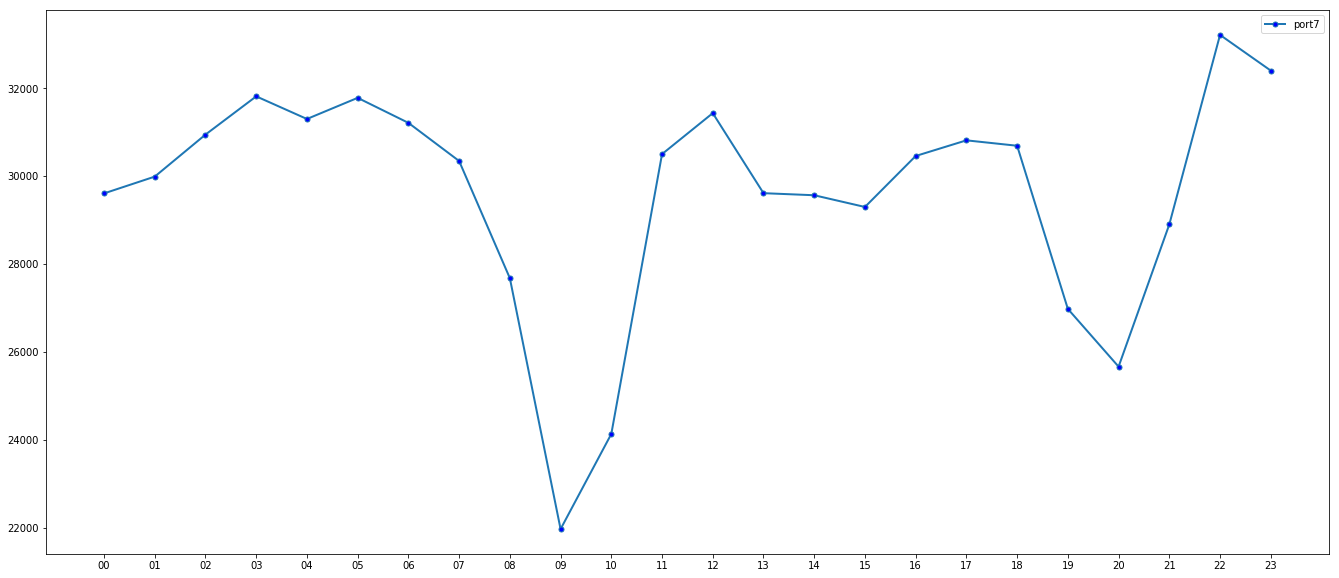

In [80]:
# temporal chart for the density of port- port7 for all hours
x = hourly_densities.keys()
counter = 0
plt.figure(figsize=(23,10))
port_name = ''

for i in range(0,len(x)):
    list_values = []

    for value in hourly_densities.values():
        val = {}
        val = value
        my_list = [elem for elem in val.values()]
        list_values.append(my_list[i])    
        y = list_values
        port_name = list(val.keys())[i]
    if(port_name == 'port7'):
        plt.plot(x , y, marker='o', markerfacecolor='blue', markersize=5, linewidth=2, label = port_name)
        temp=y
plt.legend()

# 5. Concept Drift

From the step 4, it is clear that for the port "port7" there is a sudden data variation from hours 10-11. So, we are choosing the 'port7' port and applying the concept drift method to detect the changes in data.

In [167]:
port = 'port7'

### Method 1: Adaptive Windowing method for concept drift detection:

ADWIN(ADaptive WINdowing)[1] is an adaptive sliding window algorithm to detect drift in the data, and to keep updated statistics about the given stream of data. It uses statistics from a window of variable size while detecting concept drift. The algorithm will decide the size of the window by cutting the statistics’ window at different points and analysing the average of some statistic over these two windows. If the absolute value of the difference between the two averages surpasses a pre-defined threshold, change is detected at that point and all data before that time is discarded.

* We have tested the algorithm with different values of the input parameter 'delta' and noticed changes in drift detection
* Below are the results for delta values 5 and 15

In [191]:
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN

adwin = ADWIN(delta=5)
    
for d,hd in daily_densities.items():
    data_stream = []
    h = hd.items()
    for ky,vl in h:
        port_data = vl
        if port in port_data.keys():
            data_stream.append(port_data[port])
        
    data_stream = np.array(data_stream)
    for i in range(len(data_stream)):
        adwin.add_element(data_stream[i])
        if adwin.detected_change():
            print('Change has been detected in density: ' + str(data_stream[i]) +
                      ' - at day: ' + str(d) + ' - at hour: ' + str(ky))

Change has been detected in density: 286 - at day: 2019-03-07 - at hour: 20
Change has been detected in density: 72 - at day: 2019-03-09 - at hour: 23
Change has been detected in density: 276 - at day: 2019-03-10 - at hour: 23
Change has been detected in density: 0 - at day: 2019-03-11 - at hour: 23
Change has been detected in density: 271 - at day: 2019-03-13 - at hour: 23
Change has been detected in density: 325 - at day: 2019-03-16 - at hour: 23
Change has been detected in density: 333 - at day: 2019-03-19 - at hour: 23
Change has been detected in density: 13 - at day: 2019-03-21 - at hour: 21
Change has been detected in density: 363 - at day: 2019-03-28 - at hour: 23
Change has been detected in density: 32 - at day: 2019-03-30 - at hour: 23
Change has been detected in density: 349 - at day: 2019-03-31 - at hour: 23
Change has been detected in density: 284 - at day: 2019-04-01 - at hour: 23
Change has been detected in density: 359 - at day: 2019-04-03 - at hour: 23
Change has been d

In [192]:
import numpy as np
from skmultiflow.drift_detection.adwin import ADWIN

adwin = ADWIN(delta=15)
    
for d,hd in daily_densities.items():
    data_stream = []
    h = hd.items()
    for ky,vl in h:
        port_data = vl
        if port in port_data.keys():
            data_stream.append(port_data[port])
        
    data_stream = np.array(data_stream)
    for i in range(len(data_stream)):
        adwin.add_element(data_stream[i])
        if adwin.detected_change():
            print('Change has been detected in density: ' + str(data_stream[i]) +
                      ' - at day: ' + str(d) + ' - at hour: ' + str(ky))

Change has been detected in density: 239 - at day: 2019-06-08 - at hour: 23
Change has been detected in density: 427 - at day: 2019-06-19 - at hour: 23
Change has been detected in density: 210 - at day: 2019-06-30 - at hour: 23
Change has been detected in density: 0 - at day: 2019-07-10 - at hour: 23


### Method 2: DDM

DDM (Drift Detection Method)[1] is another drift detection method that detects drift in given data. If the algorithm detects an increase in the error rate, that exceeds a calculated threshold, the change is said to be detected.

* We have tested the algorithm with different values of the input parameter 'min_num_instances','warning_level','out_control_level' and noticed changes in drift detection
* Below are the results for - 
    *min_num_instances=12,warning_level=2.0,out_control_level=3.0 and min_num_instances=6,warning_level=4.0,out_control_level=2.0*


In [193]:
import numpy as np
from skmultiflow.drift_detection import DDM
ddm = DDM(min_num_instances=12,warning_level=2.0,out_control_level=3.0)
    
for d,hd in daily_densities.items():
    data_stream = []
    h = hd.items()
    for ky,vl in h:
        port_data = vl
        if port in port_data.keys():
            data_stream.append(port_data[port])
        
    data_stream = np.array(data_stream)
    for i in range(len(data_stream)):
        adwin.add_element(data_stream[i])
        if adwin.detected_change():
            print('Change has been detected in density: ' + str(data_stream[i]) +
                      ' - at day: ' + str(d) + ' - at hour: ' + str(ky))

Change has been detected in density: 327 - at day: 2019-03-15 - at hour: 22
Change has been detected in density: 350 - at day: 2019-03-29 - at hour: 23
Change has been detected in density: 350 - at day: 2019-04-08 - at hour: 23
Change has been detected in density: 369 - at day: 2019-04-19 - at hour: 23
Change has been detected in density: 355 - at day: 2019-05-14 - at hour: 23
Change has been detected in density: 73 - at day: 2019-05-24 - at hour: 23
Change has been detected in density: 367 - at day: 2019-06-04 - at hour: 23
Change has been detected in density: 315 - at day: 2019-06-15 - at hour: 23
Change has been detected in density: 348 - at day: 2019-06-26 - at hour: 23
Change has been detected in density: 284 - at day: 2019-07-07 - at hour: 23


In [195]:
import numpy as np
from skmultiflow.drift_detection import DDM
ddm = DDM(min_num_instances=6,warning_level=4.0,out_control_level=2.0)
    
for d,hd in daily_densities.items():
    data_stream = []
    h = hd.items()
    for ky,vl in h:
        port_data = vl
        if port in port_data.keys():
            data_stream.append(port_data[port])
        
    data_stream = np.array(data_stream)
    for i in range(len(data_stream)):
        adwin.add_element(data_stream[i])
        if adwin.detected_change():
            print('Change has been detected in density: ' + str(data_stream[i]) +
                      ' - at day: ' + str(d) + ' - at hour: ' + str(ky))

Change has been detected in density: 294 - at day: 2019-03-07 - at hour: 20
Change has been detected in density: 331 - at day: 2019-03-18 - at hour: 23
Change has been detected in density: 197 - at day: 2019-04-01 - at hour: 23
Change has been detected in density: 288 - at day: 2019-04-12 - at hour: 23
Change has been detected in density: 538 - at day: 2019-04-22 - at hour: 23
Change has been detected in density: 311 - at day: 2019-05-17 - at hour: 23
Change has been detected in density: 388 - at day: 2019-05-28 - at hour: 23
Change has been detected in density: 77 - at day: 2019-06-08 - at hour: 23
Change has been detected in density: 365 - at day: 2019-06-19 - at hour: 23
Change has been detected in density: 194 - at day: 2019-06-29 - at hour: 23
Change has been detected in density: 391 - at day: 2019-07-10 - at hour: 23


# 6.  DB SCAN
## Here we are clustering the ports based on their message density using DBSCAN and categorizing the ports into ports with low, medium and high densities based on traffic (message density).

In [28]:
import numpy as np
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [29]:
# creating data frame d with only port_name and density and sorting the dataframe by densities

d = pd.DataFrame(columns = ['port_name', 'density'], data = list(density.items()))
d = d.sort_values(by=['density'])
d.reset_index(drop = True,inplace = True)
d

,port_name,density
0,mid bedford,0
1,enter2,0
2,p003,0
3,pp,0
4,plll,0
5,northarm,0
6,p009,0
7,Bills island,0
8,NN Jetty,0
9,po002,2


In [30]:
# fitting the array of densities data to DBSCAN with eps as 500 and min_samples as 2

X = np.reshape(d.density.values, (-1,1))
db=DBSCAN(eps=500,min_samples=2)
db.fit(X)  

DBSCAN(algorithm='auto', eps=500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [31]:
# displaying labels, core samples and clusters generated by DBSCAN for given eps and min_samples parameter values

labels = db.labels_
print(labels)
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[db.core_sample_indices_] = True
print(core_samples)
n_clusters = len(set(labels))
print(n_clusters)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1 -1 -1 -1
 -1 -1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False]
3


<Figure size 432x288 with 0 Axes>

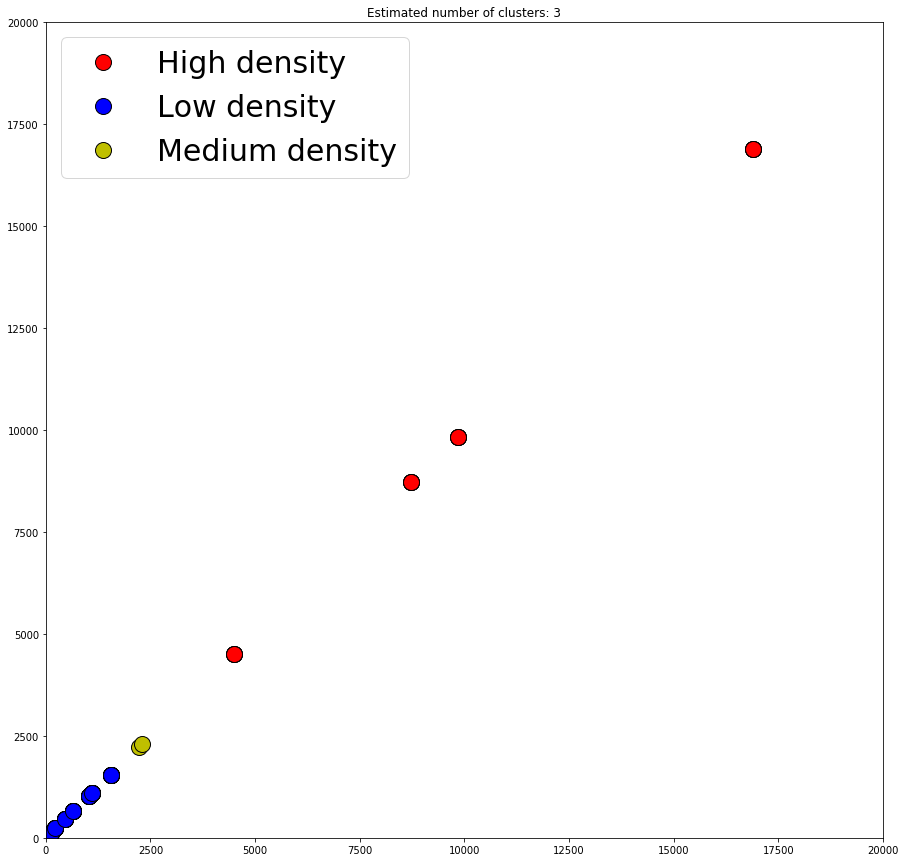

In [32]:
# Plotting the 3 clusters found from above steps with low, medium and high densities

import pylab as pl
from itertools import cycle

pl.close('all')
pl.figure(1)
pl.figure(figsize=(15,15))
pl.clf()
X = d.density.values.reshape(-1,1)
Y = d.port_name.values

#labels_dbscan = ['Ports with LOW density', 'Ports with MEDIUM density', 'Ports with HIGH density']
colors = cycle('yrbg')
for k, col in zip(labels, colors):
    class_members = [index[0] for index in np.argwhere(labels == k)]
    for index in class_members:
        x = X[index]
        markersize = 16
        if(col=='r'):
            tr=pl.plot(x[0],x[0], 'o', markerfacecolor=col, 
                markeredgecolor='k', markersize=markersize, label = 'High density')
        if(col=='b'):
            tr=pl.plot(x[0],x[0], 'o', markerfacecolor=col, 
                markeredgecolor='k', markersize=markersize, label = 'Low density')
        if(col=='y'):
            tr=pl.plot(x[0],x[0], 'o', markerfacecolor=col, 
                markeredgecolor='k', markersize=markersize, label = 'Medium density')
pl.ylim(0,20000)
pl.xlim(0,20000)
pl.title('Estimated number of clusters: %d' % n_clusters)
handles, labels = pl.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
pl.legend(handles, labels,fontsize=30)


## Representing the above clusters according to the actual port geometry and shapes

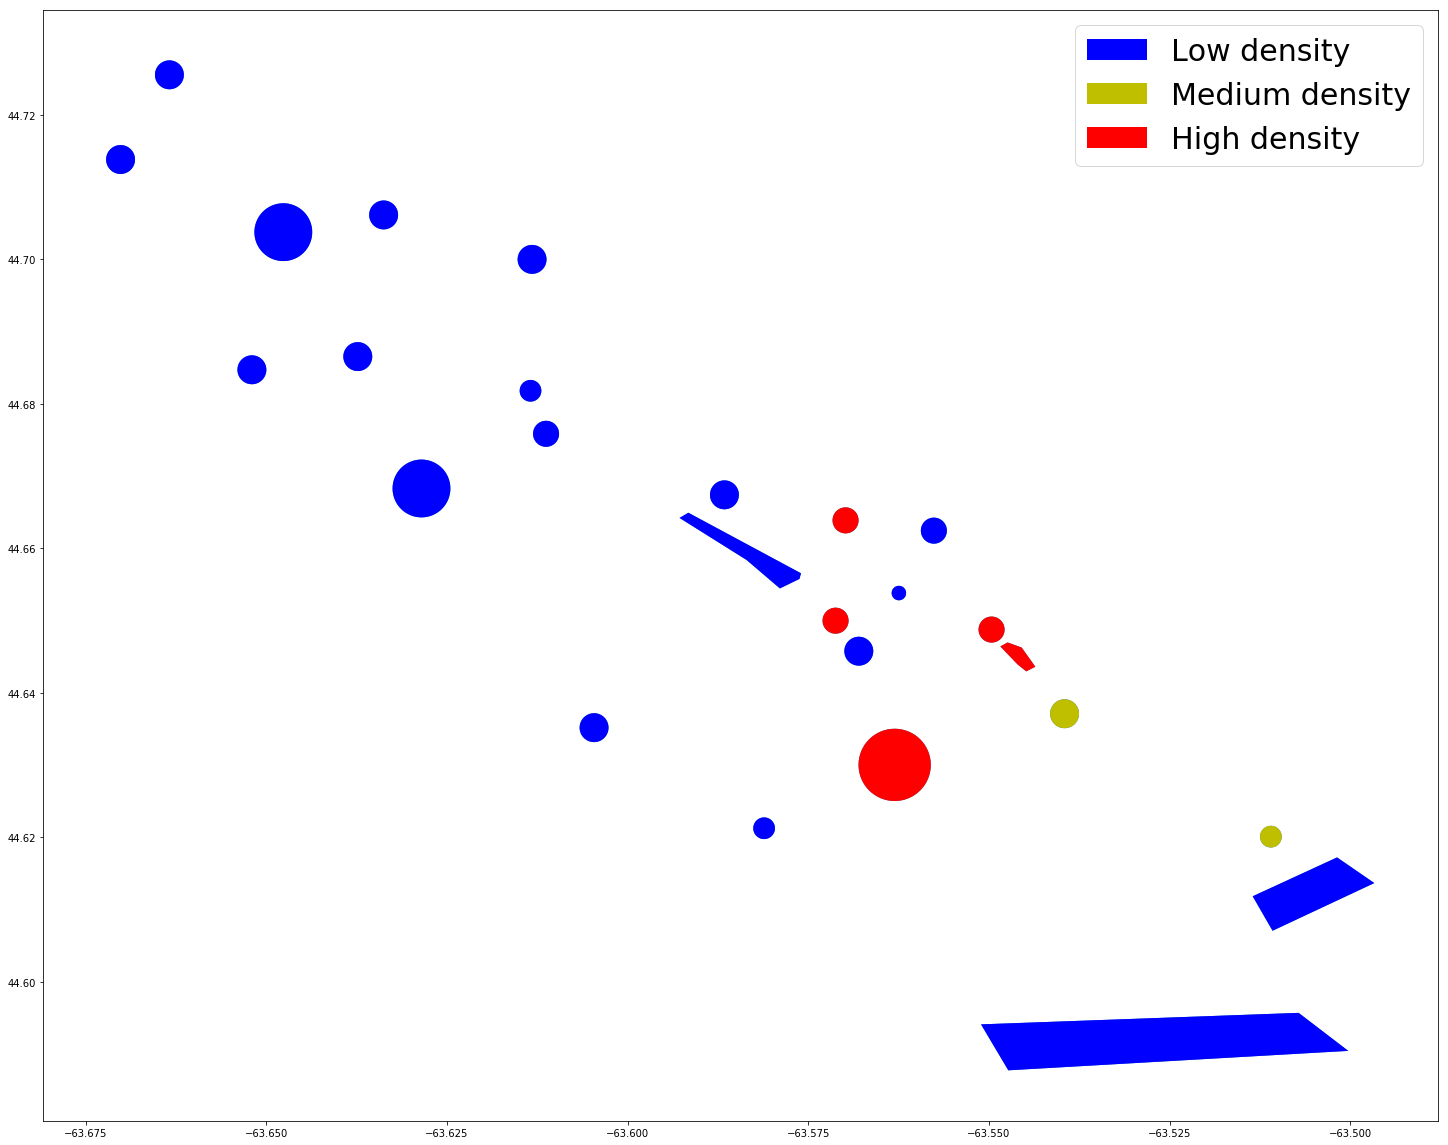

In [33]:
from pylab import Circle 

h1 = Circle((0, 0), fc="b")
h2 = Circle((0, 0), fc="y")
h3 = Circle((0, 0), fc="r")
pl = bylaw.plot(figsize=(25,25), label = 'port')
labels = db.labels_
x = 0
for k,v in d.iterrows():
    port = v.port_name
    if labels[x] == 0:
        bylaw.loc[[port],:].plot(ax = pl,color='b')
    elif labels[x] == 1:
        bylaw.loc[[port],:].plot(ax = pl,color='y')
    elif labels[x] == -1:
        bylaw.loc[[port],:].plot(ax = pl,color='r')
    x += 1
plt.legend(handles =[h1,h2,h3], labels = ['Low density', 'Medium density', 'High density'], fontsize=30)

# References:

[1]"skmultiflow.drift_detection package — scikit-multiflow 0.1.4 documentation", Scikit-multiflow.github.io, 2019. [Online]. Available: https://scikit-multiflow.github.io/scikit-multiflow/skmultiflow.drift_detection.html. [Accessed: 05- Aug- 2019].

[2]p. legend and A. Bauville, "pyplot combine multiple line labels in legend", Stack Overflow, 2019. [Online]. Available: https://stackoverflow.com/questions/26337493/pyplot-combine-multiple-line-labels-in-legend. [Accessed: 05- Aug- 2019].

[3]"Demo of DBSCAN clustering algorithm — scikit-learn 0.21.3 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html. [Accessed: 05- Aug- 2019].

[4]l. Matplotlib, "Matplotlib, legend with multiple different markers with one label", Stack Overflow, 2019. [Online]. Available: https://stackoverflow.com/questions/9262307/matplotlib-legend-with-multiple-different-markers-with-one-label. [Accessed: 05- Aug- 2019].

[5]Dal.brightspace.com, 2019. [Online]. Available: https://dal.brightspace.com/d2l/le/content/97461/Home. [Accessed: 05- Aug- 2019].
